# Regression - House Price

## 一、前言
- 作者：Susan Li
- 标题：Linear Regression in Python; Predict The Bay Area’s Home Prices
- 目的：**利用机器学习中的Linear Regression Model 预测房价走势**
- 原文地址：https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878
- 源码地址：https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Predict_Bay_Area_Home_Price.ipynb
- 数据源： https://raw.githubusercontent.com/RuiChang123/Regression_for_house_price_estimation/master/final_data.csv

**声明**
- 本文只是出于学习的目的将其翻译成中文并附上一定的注释，并没有打算将其用作盈利的目的。

## 二、研究目的
为了预测湾区的房价，作者选择了来自[湾区房屋销售数据库](http://www.sfgate.com/webdb/homesales/)和[Zillow](https://www.zillow.com/san-francisco-ca/home-values/)的房价数据集。此数据集基于 2013 年 1 月至 2015 年 12 月期间售出的房屋。它具有许多学习特征，数据集可以[从这里](https://raw.githubusercontent.com/RuiChang123/Regression_for_house_price_estimation/master/final_data.csv)下载。

## 三、数据预处理
有几个变量是没啥用的，例如“info”，“z_address”，“zipcode”（我们将“neighborhood”作为位置变量），“zipid”和“zestimate”（这是Zillow估计的价格，我们不希望模型受此影响），因此，我们将删除它们。

In [1]:
import pandas as pd
sf = pd.read_csv('final_data.csv')
sf.drop(sf.columns[[0, 2, 3, 15, 17, 18]], axis=1, inplace=True)
sf.head()

,address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zindexvalue
0,Address: 1160 Mission Street #2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,"975,700"
1,Address: 260 King Street #475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,"975,700"
2,Address: 560 Missouri Street #B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,"1,277,600"
3,Address: 350 Missouri Street,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,"1,277,600"
4,Address: 3658 Folsom Street,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,"1,248,000"


In [2]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        11330 non-null  object 
 1   bathrooms      11330 non-null  float64
 2   bedrooms       11330 non-null  float64
 3   finishedsqft   11330 non-null  float64
 4   lastsolddate   11330 non-null  object 
 5   lastsoldprice  11330 non-null  float64
 6   latitude       11330 non-null  float64
 7   longitude      11330 non-null  float64
 8   neighborhood   11330 non-null  object 
 9   totalrooms     11330 non-null  float64
 10  usecode        11330 non-null  object 
 11  yearbuilt      11330 non-null  float64
 12  zindexvalue    11330 non-null  object 
dtypes: float64(8), object(5)
memory usage: 1.1+ MB


原始数据中的变量 **zindexvalue** 的数据类型是文本型，所以我们需要通过`pandas的to_numeric`变为数字类型

In [5]:
# sf['zindexvalue'] = sf['zindexvalue'].str.replace(',', '')
# sf['zindexvalue'] = sf['zindexvalue'].convert_objects(convert_numeric=True)

sf['zindexvalue'] = pd.to_numeric(sf['zindexvalue'])

日期集中的房屋售出期为2013年1月至2015年12月。

In [6]:
sf.lastsolddate.min(), sf.lastsolddate.max()

('01/02/2013', '12/31/2015')

使用 `describe（）`来显示数值变量的汇总统计量。

**std 为标准差，25%、50% 和 75% 行显示相应的百分位数。**

In [7]:
sf.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zindexvalue
count,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04
mean,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.320205e+06
std,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,5.848170e+05
min,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,6.881000e+05
25%,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.829000e+05
50%,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.211900e+06
75%,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.480400e+06
max,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,5.333500e+06


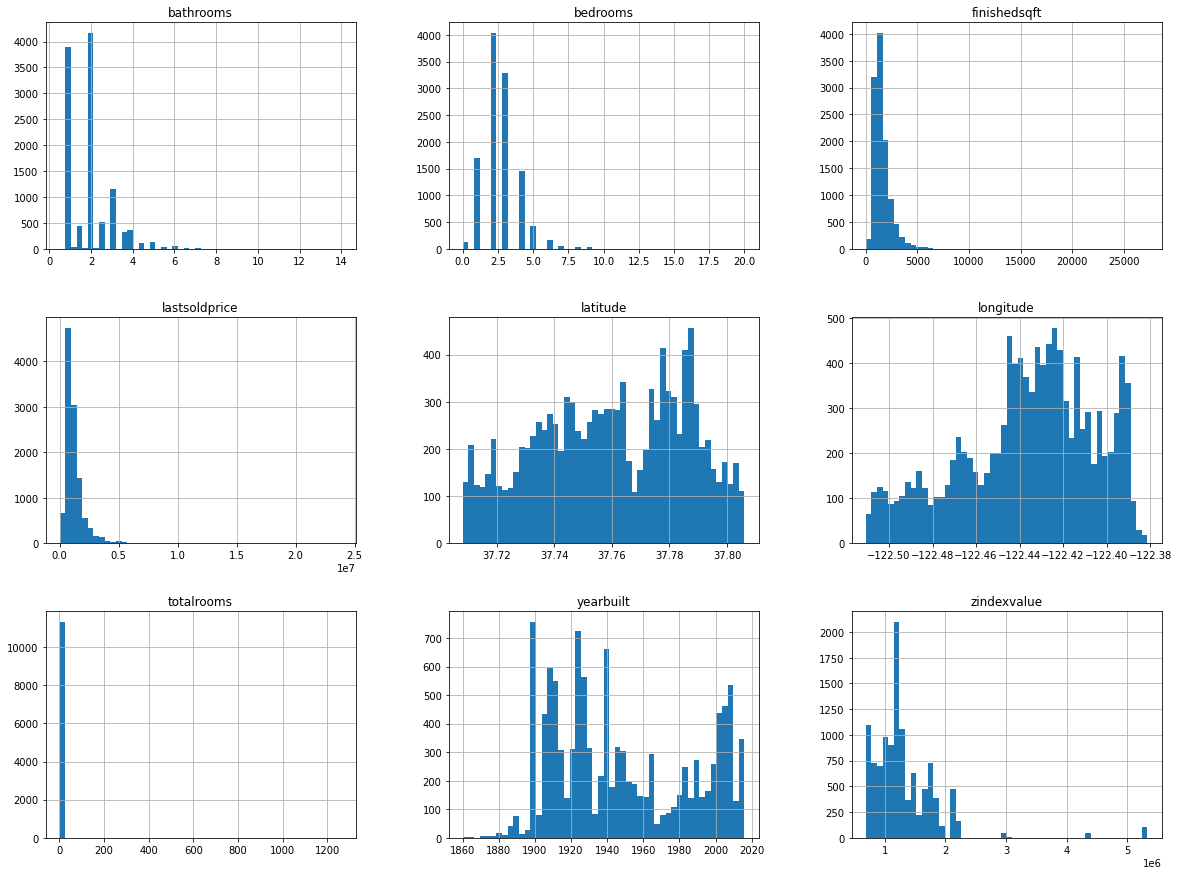

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
sf.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

观察：
1. 这些变量具有非常不同的尺度(scales)。我们将在本章稍后探讨特征缩放时讨论这个问题。
2. 许多直方图是右偏的：它们在中位数右侧比向左延伸得更远。这可能会使某些机器学习算法更难检测模式。稍后我们将尝试转换这些属性以获得更多的钟形分布(bell-shaped distributions)。

让我们创建一个包含纬度和经度的散点图来可视化数据：

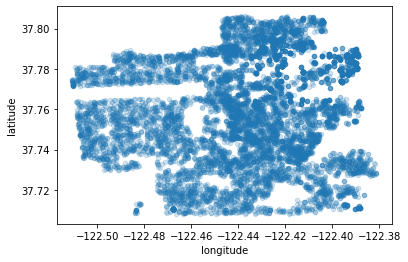

In [9]:
sf.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)
plt.savefig('map1.png')

现在，对最贵到最便宜的区域进行颜色编码：

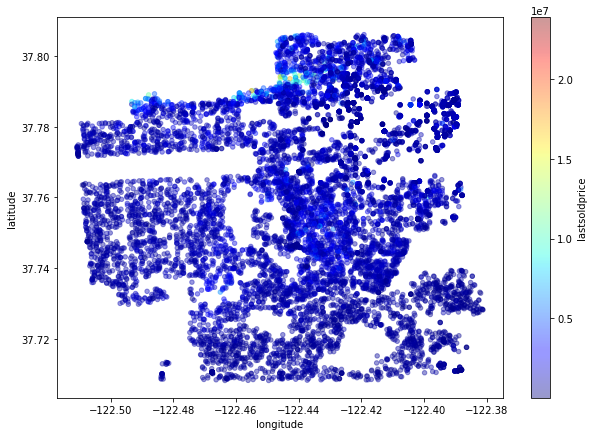

In [10]:
sf.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
    c="lastsoldprice", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.savefig('map2.png')

现在看看每个自变量与 **last sold price** 的相关程度。

In [11]:
corr_matrix = sf.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice    1.000000
finishedsqft     0.647208
bathrooms        0.536880
zindexvalue      0.460429
bedrooms         0.395478
latitude         0.283107
totalrooms       0.093527
longitude       -0.052595
yearbuilt       -0.189055
Name: lastsoldprice, dtype: float64

当 **完工面积（finished sqft)** 和 **浴室(bathrooms)** 数量增加时，**最后售价(last sold price)** 往往会上涨。您可以看到 **建造年份(yearbuilt)** 与 **最后售价(last sold price)** 之间存在小的负相关。最后，接近零的系数意味着没有线性相关性。

现在，我们将通过使用 Pandas 函数来可视化变量之间的相关性。我们将只关注一些有用的变量，这些变量似乎与 **最后售价(last sold price)** 最相关。

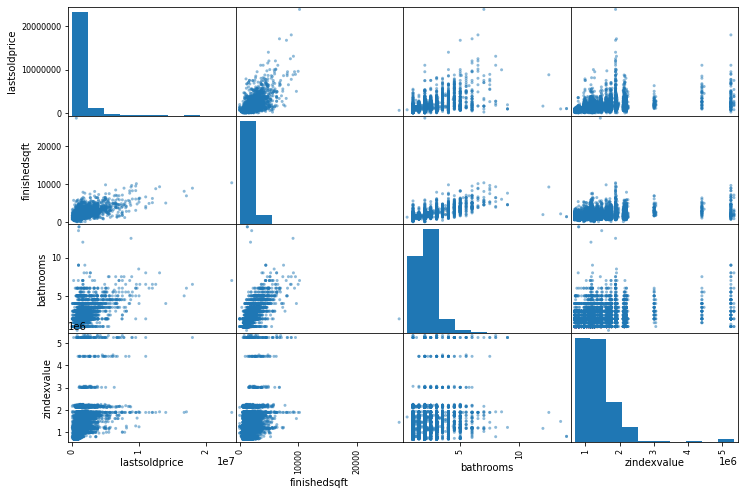

In [12]:
# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

attributes = ["lastsoldprice", "finishedsqft", "bathrooms", "zindexvalue"]
scatter_matrix(sf[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

用**完工面积（finished sqft）** 作为预测 **最后售价(last sold price)** 是最为靠谱的，因此让我们放大它们的相关散点图。

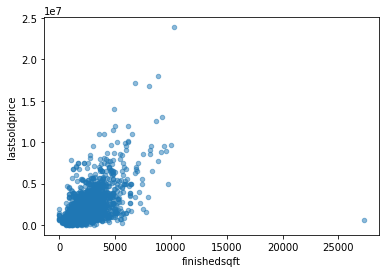

In [13]:
sf.plot(kind="scatter", x="finishedsqft", y="lastsoldprice", alpha=0.5)
plt.savefig('scatter.png')

这种相关性确实非常强。您可以清楚地看到上升趋势，并且点不会太分散。

因为每个房子都有不同的平方英尺，每个 **社区（neighborhood)** 都有不同的房价，我们真正需要的是每平方英尺的价格(the price per squre foot)。因此，我们添加了一个新变量“price_per_sqft”。然后，我们检查这个新的自变量与 **最后售价(last sold price)** 的相关性。

In [14]:
sf['price_per_sqft'] = sf['lastsoldprice']/sf['finishedsqft']

In [15]:
corr_matrix = sf.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice     1.000000
finishedsqft      0.647208
bathrooms         0.536880
zindexvalue       0.460429
bedrooms          0.395478
latitude          0.283107
totalrooms        0.093527
price_per_sqft    0.005008
longitude        -0.052595
yearbuilt        -0.189055
Name: lastsoldprice, dtype: float64

不幸的是，新的变量 **平方英尺的价格（price_per_sqft）** 仅显示与 **最后售价(last sold price)** 的非常小的正相关。但是我们仍然需要这个变量来对社区进行分组。

数据中有 71 个 **社区（neighborhoods）**，我们将对它们进行分组。

In [16]:
len(sf['neighborhood'].value_counts())

71

以下步骤将 **社区（neighborhoods）** 分为三组：
1. 低价(low price);
2. 高价格低频(high price low frequency);
3. 高价格高频(high price high frequency)。

In [17]:
freq = sf.groupby('neighborhood').count()['address']
#mean_price: average price per sqft
mean = sf.groupby('neighborhood').mean()['price_per_sqft']
cluster = pd.concat([freq, mean], axis=1)
cluster['neighborhood'] = cluster.index

In [18]:
cluster.columns = ['freq', 'price_per_sqft','neighborhood']

In [19]:
cluster.describe()

,freq,price_per_sqft
count,71.000000,71.000000
mean,159.577465,1664.908308
std,126.572696,3619.277749
min,3.000000,374.201197
25%,67.500000,613.337664
50%,123.000000,756.246284
75%,210.500000,985.156646
max,540.000000,26914.471572


将 **社区（neighborhoods）** 分为三组：
1. 低价(low price);
2. 高价低频(high price low frequency);
3. 高价高频(high price high frequency).

这些是低价(low price)社区：

In [20]:
cluster1 = cluster[cluster.price_per_sqft < 756]
cluster1.index

Index(['Bayview', 'Central Richmond', 'Central Sunset', 'Crocker Amazon',
       'Daly City', 'Diamond Heights', 'Excelsior', 'Forest Hill',
       'Forest Hill Extension', 'Golden Gate Heights', 'Ingleside',
       'Ingleside Heights', 'Ingleside Terrace', 'Inner Parkside',
       'Inner Richmond', 'Inner Sunset', 'Lakeshore', 'Little Hollywood',
       'Merced Heights', 'Mission Terrace', 'Mount Davidson Manor',
       'Oceanview', 'Outer Mission', 'Outer Parkside', 'Outer Richmond',
       'Outer Sunset', 'Parkside', 'Portola', 'Silver Terrace', 'Sunnyside',
       'Visitacion Valley', 'West Portal', 'Western Addition',
       'Westwood Highlands', 'Westwood Park'],
      dtype='object', name='neighborhood')

这些是高价低频(high price low frequency)社区：

In [21]:
cluster_temp = cluster[cluster.price_per_sqft >= 756]
cluster2 = cluster_temp[cluster_temp.freq <123]
cluster2.index

Index(['Buena Vista Park', 'Central Waterfront - Dogpatch', 'Corona Heights',
       'Haight-Ashbury', 'Lakeside', 'Lone Mountain', 'Midtown Terrace',
       'North Beach', 'North Waterfront', 'Parnassus - Ashbury',
       'Presidio Heights', 'Sea Cliff', 'St. Francis Wood', 'Telegraph Hill',
       'Twin Peaks'],
      dtype='object', name='neighborhood')

这些是高价高频(high price high frequency)社区：

In [22]:
cluster3 = cluster_temp[cluster_temp.freq >=123]
cluster3.index

Index(['Bernal Heights', 'Cow Hollow', 'Downtown',
       'Eureka Valley - Dolores Heights - Castro', 'Glen Park', 'Hayes Valley',
       'Lake', 'Lower Pacific Heights', 'Marina', 'Miraloma Park', 'Mission',
       'Nob Hill', 'Noe Valley', 'North Panhandle', 'Pacific Heights',
       'Potrero Hill', 'Russian Hill', 'South Beach', 'South of Market',
       'Van Ness - Civic Center', 'Yerba Buena'],
      dtype='object', name='neighborhood')

基于上述分组，我们添加一个新组列：

In [23]:
def get_group(x):
    if x in cluster1.index:
        return 'low_price'
    elif x in cluster2.index:
        return 'high_price_low_freq'
    else:
        return 'high_price_high_freq'
sf['group'] = sf.neighborhood.apply(get_group)

现在，我们可以预处理一个用于数据分类的 **数据特征 ”usecode“**

In [24]:
sf.head()

,address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zindexvalue,price_per_sqft,group
0,Address: 1160 Mission Street #2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,975700,1246.404602,high_price_high_freq
1,Address: 260 King Street #475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,975700,830.564784,high_price_high_freq
2,Address: 560 Missouri Street #B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1277600,1049.122807,high_price_high_freq
3,Address: 350 Missouri Street,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,1277600,1210.219632,high_price_high_freq
4,Address: 3658 Folsom Street,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1248000,1176.923077,high_price_high_freq


执行上述预处理后，我们不再需要以下列：“地址，最后销售日期，纬度，经度，社区，price_per_sqft”（“address, lastsolddate, latitude, longitude, neighborhood, price_per_sqft”），

因此，我们从分析中删除它们。

In [25]:
sf.drop(sf.columns[[0, 4, 6, 7, 8, 13]], axis=1, inplace=True)
sf.head()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,totalrooms,usecode,yearbuilt,zindexvalue,group
0,2.0,2.0,1043.0,1300000.0,4.0,Condominium,2007.0,975700,high_price_high_freq
1,1.0,1.0,903.0,750000.0,3.0,Condominium,2004.0,975700,high_price_high_freq
2,4.0,3.0,1425.0,1495000.0,6.0,Condominium,2003.0,1277600,high_price_high_freq
3,3.0,3.0,2231.0,2700000.0,10.0,SingleFamily,1927.0,1277600,high_price_high_freq
4,3.0,3.0,1300.0,1530000.0,4.0,SingleFamily,1900.0,1248000,high_price_high_freq


In [26]:
sf = sf[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'usecode', 'yearbuilt', 
         'zindexvalue', 'group', 'lastsoldprice']]
sf.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,usecode,yearbuilt,zindexvalue,group,lastsoldprice
0,2.0,2.0,1043.0,4.0,Condominium,2007.0,975700,high_price_high_freq,1300000.0
1,1.0,1.0,903.0,3.0,Condominium,2004.0,975700,high_price_high_freq,750000.0
2,4.0,3.0,1425.0,6.0,Condominium,2003.0,1277600,high_price_high_freq,1495000.0
3,3.0,3.0,2231.0,10.0,SingleFamily,1927.0,1277600,high_price_high_freq,2700000.0
4,3.0,3.0,1300.0,4.0,SingleFamily,1900.0,1248000,high_price_high_freq,1530000.0


但在构建模型之前，我们需要为这两个分类变量创建虚拟变量（dummy variables）：“usecode”和“group”。

In [27]:
X = sf[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'usecode', 'yearbuilt', 
         'zindexvalue', 'group']]
Y = sf['lastsoldprice']
#create dummy variables for groups
n = pd.get_dummies(sf.group)
X = pd.concat([X, n], axis=1)

In [28]:
m = pd.get_dummies(sf.usecode)
X = pd.concat([X, m], axis=1)

In [29]:
drops = ['group', 'usecode']
X.drop(drops, inplace=True, axis=1)

这是创建虚拟变量后的数据：

In [30]:
X.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,yearbuilt,zindexvalue,high_price_high_freq,high_price_low_freq,low_price,Apartment,Condominium,Cooperative,Duplex,Miscellaneous,Mobile,MultiFamily2To4,MultiFamily5Plus,SingleFamily,Townhouse
0,2.0,2.0,1043.0,4.0,2007.0,975700,1,0,0,0,1,0,0,0,0,0,0,0,0
1,1.0,1.0,903.0,3.0,2004.0,975700,1,0,0,0,1,0,0,0,0,0,0,0,0
2,4.0,3.0,1425.0,6.0,2003.0,1277600,1,0,0,0,1,0,0,0,0,0,0,0,0
3,3.0,3.0,2231.0,10.0,1927.0,1277600,1,0,0,0,0,0,0,0,0,0,0,1,0
4,3.0,3.0,1300.0,4.0,1900.0,1248000,1,0,0,0,0,0,0,0,0,0,0,1,0


In [31]:
Y.shape

(11330,)

## 四、训练和构建线性回归模型

### 数据标准化

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [34]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### 线性回归模型

In [36]:
y_pred = regressor.predict(X_test)
print('Liner Regression R squared: %.4f' % regressor.score(X_test, y_test))

Liner Regression R squared: 0.5655


线性回归 R 平方为：0.5655

因此，在我们的模型中，Y 中 56.19% 的可变性可以用 X 来解释。结果确实不怎么样。。。。


### 计算均方根误差 （RMSE）

In [37]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Liner Regression RMSE: %.4f' % lin_rmse)

Liner Regression RMSE: 613531.2648


我们的模型能够在实际价格的 613,531.2648 美元范围内预测测试集中每栋房屋的价值。

### 计算平均绝对误差 (MAE)

In [38]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print('Liner Regression MAE: %.4f' % lin_mae)

Liner Regression MAE: 361423.1115


## 五、随机森林模型
让我们尝试一个更复杂的模型，看看结果是否可以改进 - RandomForestRegressor：

In [39]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [40]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.6880


In [41]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 519956.8850


结果比想象中好好多！！

## 六、梯度提升

In [42]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [43]:
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared": 0.6575


GradientBoostingRegressor的 R 平方： 0.6575

In [44]:
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 544742.0149


作者认为这是迄今为止我们取得的最好成绩，所以，这是我们的最终模型。

我们在模型中使用了 19 个特征（变量）。让我们找出哪些功能很重要，反之亦然。

In [45]:
feature_labels = np.array(['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'yearbuilt', 'zindexvalue', 
                           'high_price_high_freq', 'high_price_low_freq', 'low_price', 'Apartment', 'Condominium', 'Cooperative', 
                          'Duplex', 'Miscellaneous', 'Mobile', 'MultiFamily2To4', 'MultiFamily5Plus', 'SingleFamily', 
                           'Townhouse'])
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

Apartment-0.00%
MultiFamily5Plus-0.00%
Mobile-0.00%
Miscellaneous-0.00%
Cooperative-0.00%
Townhouse-0.00%
Condominium-0.10%
high_price_low_freq-0.13%
Duplex-0.15%
MultiFamily2To4-0.28%
bedrooms-0.45%
high_price_high_freq-0.98%
yearbuilt-1.22%
totalrooms-2.31%
SingleFamily-5.22%
low_price-6.05%
bathrooms-13.13%
zindexvalue-17.80%
finishedsqft-52.18%


最重要的特征是"finished sqft, zindex value, number of bathrooms, total rooms, year built"等等。而最不重要的特征是“Apartment”，这意味着无论这个单位是否是“Apartment”，都与售价无关。总体而言，这19个功能中的大多数都被使用。